In [3]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import pathlib
import matplotlib.pyplot as plt 
import cv2

In [4]:
print(tf.__version__)

2.9.1


In [5]:
root_dir  = os.getcwd()

In [6]:
challenge_dir = os.path.join(root_dir, "Multilabel")
os.path.exists(challenge_dir)

True

In [7]:
label_file = os.path.join(challenge_dir, "labels.txt")

In [8]:
img_dir = os.path.join(challenge_dir, "photos")
os.path.exists(img_dir)

True

In [9]:
with open(label_file, 'r') as f:
    f = f.readlines()
img_name, a,b,c,d = [],[],[],[],[]
for i in f:
    lines = i.split(" ")
    img_name.append(lines[0]), a.append(lines[1]), b.append(lines[2]), c.append(lines[3]) , d.append(lines[4])
    

In [10]:
with open(label_file, 'r') as f:
    f = f.readlines()
img_name , a,b,c,d = [],[],[],[],[]
for i in f:
    lines = i.split(" ")
    img_name.append(lines[0]), a.append(lines[1]), b.append(lines[2]), c.append(lines[3]), d.append(lines[4])

In [11]:

def updated_label_img_name(f):
    updated_list = []
    for i in f:
        
        splitted_val = i.split()
        img_var = splitted_val[0]
        img_raw_name, jpg_raw_name = img_var.split(".")[0], img_var.split(".")[1]
        img_, img_num = img_raw_name.split("_")[0], img_raw_name.split("_")[1]
        if len(img_num) == 1:
            updated_img_num = ".".join(["_".join([img_, img_num.rjust(3, '0')]), jpg_raw_name])
            splitted_val[0] = updated_img_num
            updated_list.append(splitted_val)
        if len(img_num) == 2:

            updated_img_num2 = ".".join(["_".join([img_, img_num.rjust(3, '0')]), jpg_raw_name])
            splitted_val[0] = updated_img_num2
            updated_list.append(splitted_val)
        if len(img_num) == 3:
            updated_list.append(splitted_val)
    return updated_list

value = updated_label_img_name(f)

In [12]:
def rename_(folder_path):
    for img in os.listdir(folder_path):
        path = os.path.join(folder_path, img)
        img_, acc = path.split("_")[0], path.split("_")[1]
        num_, replace  = acc.split(".")[0], acc.split(".")[1]
        if len(num_)==1:
            # getting old name 
            replaced_num = num_.rjust(3, '0')
            new_half_name = ".".join([replaced_num , replace])
            new_full_name = "_".join([img_, new_half_name])
            os.rename(path, new_full_name)
        if len(num_) == 2:
            replaced_num = num_.rjust(3, '0')
            new_half_name = ".".join([replaced_num , replace])
            new_full_name = "_".join([img_, new_half_name])
            os.rename(path, new_full_name)

<class 'numpy.ndarray'>


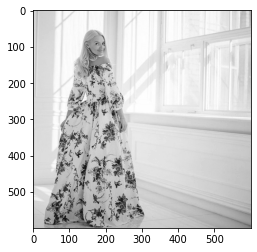

In [13]:
for img in os.listdir(img_dir):
    img_array = cv2.imread(os.path.join(img_dir  , img), cv2.IMREAD_GRAYSCALE)
    print(type(img_array))
    plt.imshow(img_array, cmap= "gray")
    plt.show()
    break
    

In [14]:
img_array.shape

(600, 600)

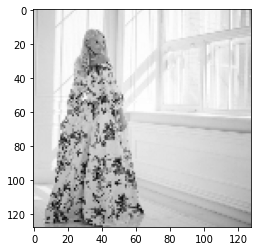

In [15]:
IMG_SIZE = 128
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap = "gray")
plt.show()

In [16]:
img_list = []
for i in os.listdir(img_dir):
    img_list.append(i)

In [17]:
val = []
for i in value:
    val.append(i[1:])

In [21]:
value = updated_label_img_name(f)
print(len(value))
for i in range(970):
    if img_list[i] != value[i][0]:
        del value[i]
print(len(value))

975
972


['image_972.jpg', '1', 'NA', '1', '0']

In [1]:
df.loc[2][0],df.loc[2][1],df.loc[2][2],df.loc[2][3]

NameError: name 'df' is not defined

In [1]:
l = [1,2,3,4,5]
for i , k in enumerate(l):
    print(i,k)

0 1
1 2
2 3
3 4
4 5


In [169]:
training_data = []
def create_training_data(img_dir, label_list):
    for idx, img in enumerate(os.listdir(img_dir)):
        img_path = os.path.join(img_dir,img)
        
        img_array = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
        training_data.append([new_array,[label_list.loc[i][0], label_list.loc[i][1], label_list.loc[i][2], label_list.loc[i][3]]])
        # plt.imshow(img_array, cmap = "gray")
        # plt.show()
        # break
    return training_data
real_data = create_training_data(img_dir, df)

In [173]:
type(real_data)

list

In [32]:
val_without_img_name = []
for i in value:
    val_without_img_name.append([i[1], i[2], i[3], i[4]])

In [33]:
val_without_img_name

[['1', 'NA', '0', '1'],
 ['NA', '0', '0', '0'],
 ['1', '1', '0', '0'],
 ['1', '1', '0', '0'],
 ['1', '1', '0', '0'],
 ['NA', '0', '1', 'NA'],
 ['1', '1', '0', '0'],
 ['1', '1', '1', '0'],
 ['1', '1', '1', '0'],
 ['1', 'NA', '1', '0'],
 ['1', '1', '1', '0'],
 ['1', '1', '1', '0'],
 ['1', '0', '0', '0'],
 ['1', '1', '1', '0'],
 ['1', 'NA', '0', '0'],
 ['0', '0', '0', '0'],
 ['1', '1', '0', '0'],
 ['1', '1', '0', '0'],
 ['NA', '1', '1', 'NA'],
 ['1', '1', '1', '0'],
 ['1', '1', '0', '0'],
 ['1', '1', '0', '0'],
 ['1', '1', '0', '0'],
 ['1', '1', '1', '0'],
 ['1', '1', '0', '1'],
 ['0', '1', '0', '0'],
 ['1', 'NA', '1', '0'],
 ['1', '0', '0', '1'],
 ['1', '1', '0', '0'],
 ['1', '1', '0', '0'],
 ['1', '1', '0', '0'],
 ['1', '1', '0', '0'],
 ['1', '1', 'NA', '0'],
 ['0', '1', '0', '1'],
 ['1', '1', '0', '0'],
 ['1', '1', 'NA', '0'],
 ['1', '1', '1', '0'],
 ['0', 'NA', '1', '0'],
 ['1', 'NA', '0', 'NA'],
 ['1', '1', 'NA', 'NA'],
 ['1', '1', '1', '0'],
 ['NA', '1', '0', '0'],
 ['1', '1', '1', 

In [187]:
l = [[1,2,3,4] , (2,3,4,5,6) , (3,4,5,6,7) , set([23,4,5,45,4,4,5,45,45,4,5]) , {'k1' :"sudh" , "k2" : "ineuron","k3":
            "kumar" , 3:6 , 7:8} , ["ineuron" , "data science "]]

In [34]:
import pandas as pd 

In [51]:
df = pd.DataFrame(val_without_img_name,columns=['a','b','c','d'])

In [52]:
df.a.value_counts()

1     786
0     106
NA     80
Name: a, dtype: int64

In [53]:
df.isnull().sum()

a    0
b    0
c    0
d    0
dtype: int64

In [54]:
df.a = df.a.replace("NA", np.nan)

In [55]:
df.b = df.b.replace("NA", np.nan)

In [56]:
df.c = df.c.replace("NA", np.nan)
df.d = df.d.replace("NA", np.nan)

In [57]:
a = df.isnull().sum()

In [58]:
a[0], a[1]

(80, 91)

In [59]:
for i in df.columns:
    print("Nulll value in column {} is: ".format(df[i].name), df[i].isnull().sum())
    print("***********************")
    print("Filling all the values with max, in column {} The max value is {}".format(df[i].name,df[i].value_counts().index[0]))
    print("Filling values   for column {} ".format(df[i].name))
    df[i] =  df[i].fillna(df[i].value_counts().index[0])
print("Dealt with missing values in the data")

Nulll value in column a is:  80
***********************
Filling all the values with max, in column a The max value is 1
Filling values   for column a 
Nulll value in column b is:  91
***********************
Filling all the values with max, in column b The max value is 1
Filling values   for column b 
Nulll value in column c is:  92
***********************
Filling all the values with max, in column c The max value is 1
Filling values   for column c 
Nulll value in column d is:  92
***********************
Filling all the values with max, in column d The max value is 0
Filling values   for column d 
Dealt with missing values in the data


In [128]:
print(df.a.value_counts().index[0])

1


In [133]:
df.isnull().sum()

a    0
b    0
c    0
d    0
dtype: int64

In [137]:
df.to_csv("Clean_data.csv" , index=None)

In [138]:
df2 = pd.read_csv("Clean_data.csv")

In [139]:
df2

,a,b,c,d
0,1,1,0,1
1,1,0,0,0
2,1,1,0,0
3,1,1,0,0
4,1,1,0,0
...,...,...,...,...
967,1,1,1,1
968,1,1,0,0
969,1,1,1,0
970,0,1,0,0


In [176]:
import random
random.shuffle(training_data)

In [177]:
X = []
y = []
for feature, label in training_data:
    X.append(feature)
    y.append(label)

# We can't use list in neural network so we need to convert it 

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1) # The last one is one becuase it is grayscale 


In [194]:
real_y = []
for i in y:
    a,b,c,d = i[0] , i[1], i[2], i[3]
    real_y.append([int(a), int(b), int(c), int(d)])


In [198]:
y = np.array(real_y)

In [189]:
import pickle

In [181]:
artifacts_dir = os.path.join(root_dir, "artifacts")


In [182]:
from src.utils import common



In [183]:
data_dir = os.path.join(artifacts_dir, "data_dir")
X_data = os.path.join(data_dir, "X.pickle")
y_data = os.path.join(data_dir , "y.pickle")
common.create_directories([data_dir])
os.path.exists(data_dir)

True

In [185]:
pickle.dump(X, open(X_data,"wb"))

In [199]:
pickle.dump(y, open(y_data, "wb"))